#   Time-series based Binary classificaiton on Industrial data
#### In this NoteBook we will start by analyzing data and make sure the distribution is acceptable to train, then we will train our model using Random forest, without using too much Hyper parameter tuning due to it having pretty generic default parameters.

Before doing any thing please make sure to install the needed libraries to the environment you specified.

In [43]:
# install all the needed libraries
!pip install -r requirements.txt

### Reading Data and Converting to CSV Format 

In [75]:
import pandas as pd 
  

read_file = pd.read_excel ("data\M420_machine_data.xlsx") 
  
read_file.to_csv ("data\converted_data.csv",  
                  index = None, 
                  header=True) 
    
data = pd.DataFrame(pd.read_csv("data\converted_data.csv")) 
data

,Machine,Monitor,From,To,Total Acceleration Min ((m/s²)²),Total Acceleration Max ((m/s²)²),Total Acceleration Avg ((m/s²)²),Horizontal Velocity Min (mm/s),Horizontal Velocity Max (mm/s),Horizontal Velocity Avg (mm/s),...,Vertical Velocity Min (mm/s),Vertical Velocity Max (mm/s),Vertical Velocity Avg (mm/s),Temperature Min (°C),Temperature Max (°C),Temperature Avg (°C),Audio Min (dB),Audio Max (dB),Audio Avg (dB),Arıza
0,M420,M420 Dişli Grubu,2023-03-17 00:00:00,2023-03-17 00:01:00,10224,10317,10271,133,150,143,...,91,107,99,7169,7172,7170,7412,7483,7443,0
1,M420,M420 Dişli Grubu,2023-03-17 00:01:00,2023-03-17 00:02:00,10227,10287,10261,128,157,142,...,90,101,96,7167,7169,7168,7419,7522,7464,0
2,M420,M420 Dişli Grubu,2023-03-17 00:02:00,2023-03-17 00:03:00,10222,10333,10270,135,154,148,...,90,98,93,7166,7168,7167,7453,7501,7467,0
3,M420,M420 Dişli Grubu,2023-03-17 00:03:00,2023-03-17 00:04:00,10249,10348,10287,140,163,149,...,86,108,99,7164,7167,7166,7418,7460,7443,0
4,M420,M420 Dişli Grubu,2023-03-17 00:04:00,2023-03-17 00:05:00,10214,10321,10268,131,152,142,...,85,108,95,7165,7166,7166,7407,7508,7460,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30631,M420,M420 Dişli Grubu,2023-04-29 23:37:00,2023-04-29 23:38:00,10206,10405,10320,156,177,166,...,97,129,110,6785,6787,6785,8010,8116,8053,0
30632,M420,M420 Dişli Grubu,2023-04-29 23:38:00,2023-04-29 23:39:00,10292,10352,10330,159,171,163,...,102,133,113,6788,6790,6790,7992,8046,8025,0
30633,M420,M420 Dişli Grubu,2023-04-29 23:39:00,2023-04-29 23:40:00,10250,10372,10297,167,182,175,...,105,138,118,6790,6791,6790,7998,8124,8038,0
30634,M420,M420 Dişli Grubu,2023-04-29 23:40:00,2023-04-29 23:41:00,10252,10363,10302,142,176,164,...,95,128,109,6793,6793,6793,7987,8062,8033,0


#   Preprocess data and drop the unwanted features

In [45]:
# İlk birkaç satırı görüntüleyin
print(data.head())


  Machine           Monitor                 From                   To  \
0    M420  M420 Dişli Grubu  2023-03-17 00:00:00  2023-03-17 00:01:00   
1    M420  M420 Dişli Grubu  2023-03-17 00:01:00  2023-03-17 00:02:00   
2    M420  M420 Dişli Grubu  2023-03-17 00:02:00  2023-03-17 00:03:00   
3    M420  M420 Dişli Grubu  2023-03-17 00:03:00  2023-03-17 00:04:00   
4    M420  M420 Dişli Grubu  2023-03-17 00:04:00  2023-03-17 00:05:00   

   Total Acceleration Min ((m/s²)²)  Total Acceleration Max ((m/s²)²)  \
0                             10224                             10317   
1                             10227                             10287   
2                             10222                             10333   
3                             10249                             10348   
4                             10214                             10321   

   Total Acceleration Avg ((m/s²)²)  Horizontal Velocity Min (mm/s)  \
0                             10271                

In [46]:
# Veri tipi bilgilerini inceleyin
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30636 entries, 0 to 30635
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Machine                           30636 non-null  object
 1   Monitor                           30636 non-null  object
 2   From                              30636 non-null  object
 3   To                                30636 non-null  object
 4   Total Acceleration Min ((m/s²)²)  30636 non-null  int64 
 5   Total Acceleration Max ((m/s²)²)  30636 non-null  int64 
 6   Total Acceleration Avg ((m/s²)²)  30636 non-null  int64 
 7   Horizontal Velocity Min (mm/s)    30636 non-null  int64 
 8   Horizontal Velocity Max (mm/s)    30636 non-null  int64 
 9   Horizontal Velocity Avg (mm/s)    30636 non-null  int64 
 10  Axial Velocity Min (mm/s)         30636 non-null  int64 
 11  Axial Velocity Max (mm/s)         30636 non-null  int64 
 12  Axial Velocity Avg

In [47]:
# Temel istatistikleri görüntüleyin
print(data.describe())


       Total Acceleration Min ((m/s²)²)  Total Acceleration Max ((m/s²)²)  \
count                      30636.000000                      30636.000000   
mean                       10333.885037                      10443.531793   
std                          182.009566                        193.763859   
min                         9519.000000                       9771.000000   
25%                        10197.000000                      10297.000000   
50%                        10273.000000                      10382.000000   
75%                        10492.000000                      10606.000000   
max                        10937.000000                      11291.000000   

       Total Acceleration Avg ((m/s²)²)  Horizontal Velocity Min (mm/s)  \
count                      30636.000000                    30636.000000   
mean                       10387.845737                      138.144895   
std                          186.144577                       24.000398   
min   

In [48]:
# Eksik değerleri kontrol edin
print(data.isna().sum())

Machine                             0
Monitor                             0
From                                0
To                                  0
Total Acceleration Min ((m/s²)²)    0
Total Acceleration Max ((m/s²)²)    0
Total Acceleration Avg ((m/s²)²)    0
Horizontal Velocity Min (mm/s)      0
Horizontal Velocity Max (mm/s)      0
Horizontal Velocity Avg (mm/s)      0
Axial Velocity Min (mm/s)           0
Axial Velocity Max (mm/s)           0
Axial Velocity Avg (mm/s)           0
Vertical Velocity Min (mm/s)        0
Vertical Velocity Max (mm/s)        0
Vertical Velocity Avg (mm/s)        0
Temperature Min (°C)                0
Temperature Max (°C)                0
Temperature Avg (°C)                0
Audio Min (dB)                      0
Audio Max (dB)                      0
Audio Avg (dB)                      0
Arıza                               0
dtype: int64


In [49]:
# Get the number of unique values in each column
unique_counts = data.nunique()

print(unique_counts)

Machine                                 1
Monitor                                 1
From                                30636
To                                  30636
Total Acceleration Min ((m/s²)²)      962
Total Acceleration Max ((m/s²)²)     1040
Total Acceleration Avg ((m/s²)²)      985
Horizontal Velocity Min (mm/s)        214
Horizontal Velocity Max (mm/s)        350
Horizontal Velocity Avg (mm/s)        263
Axial Velocity Min (mm/s)             780
Axial Velocity Max (mm/s)             993
Axial Velocity Avg (mm/s)             872
Vertical Velocity Min (mm/s)          272
Vertical Velocity Max (mm/s)          402
Vertical Velocity Avg (mm/s)          330
Temperature Min (°C)                 3318
Temperature Max (°C)                 3321
Temperature Avg (°C)                 3340
Audio Min (dB)                       2807
Audio Max (dB)                       2825
Audio Avg (dB)                       2810
Arıza                                   2
dtype: int64


#### Looking at the unique values looks like Machine and Monitor are always the same value, that's because the data has been taken for the same Industrial machine but looks like we have to drop both of these feature.

#   Visual Analyzes

### Before visualizing our data we must index time-based data to different features to make it easier to our algorithms to understand, drop the unwanted features such as Machine and Monitor 

In [58]:
import pandas as pd

# Convert the 'From' and 'To' columns to datetime
data['From'] = pd.to_datetime(data['From'])
data['To'] = pd.to_datetime(data['To'])

# Create time-based features
data['From_day'] = data['From'].dt.day
data['From_hour'] = data['From'].dt.hour
data['From_minute'] = data['From'].dt.minute
data['From_second'] = data['From'].dt.second

data['To_day'] = data['To'].dt.day
data['To_hour'] = data['To'].dt.hour
data['To_minute'] = data['To'].dt.minute
data['To_second'] = data['To'].dt.second

# Drop original 'From' and 'To' columns, as well as non-feature columns
features = data.drop(columns=['Arıza', 'From', 'To', 'Machine', 'Monitor'])
target = data['Arıza']

# Optional: Display the new features and target
print(features.head())
print(target.head())


   Total Acceleration Min ((m/s²)²)  Total Acceleration Max ((m/s²)²)  \
0                             10224                             10317   
1                             10227                             10287   
2                             10222                             10333   
3                             10249                             10348   
4                             10214                             10321   

   Total Acceleration Avg ((m/s²)²)  Horizontal Velocity Min (mm/s)  \
0                             10271                             133   
1                             10261                             128   
2                             10270                             135   
3                             10287                             140   
4                             10268                             131   

   Horizontal Velocity Max (mm/s)  Horizontal Velocity Avg (mm/s)  \
0                             150                             143

####  Let's examine the time series based features and visualize the distribution of each measurement over time.

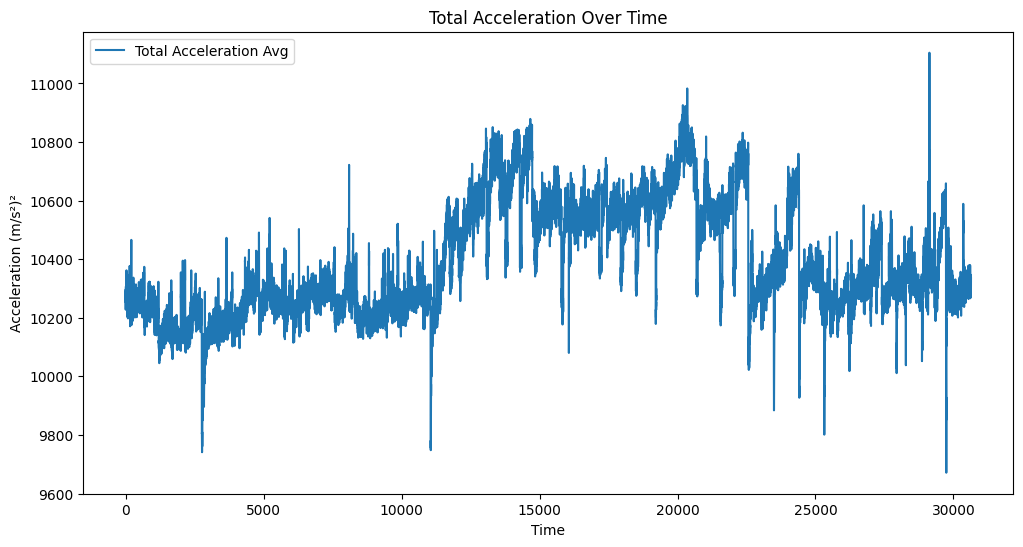

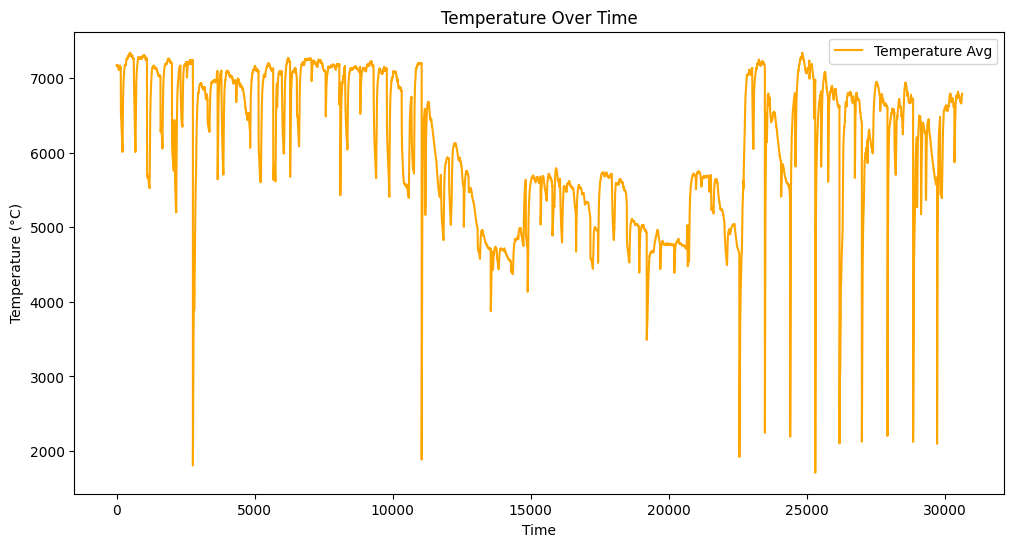

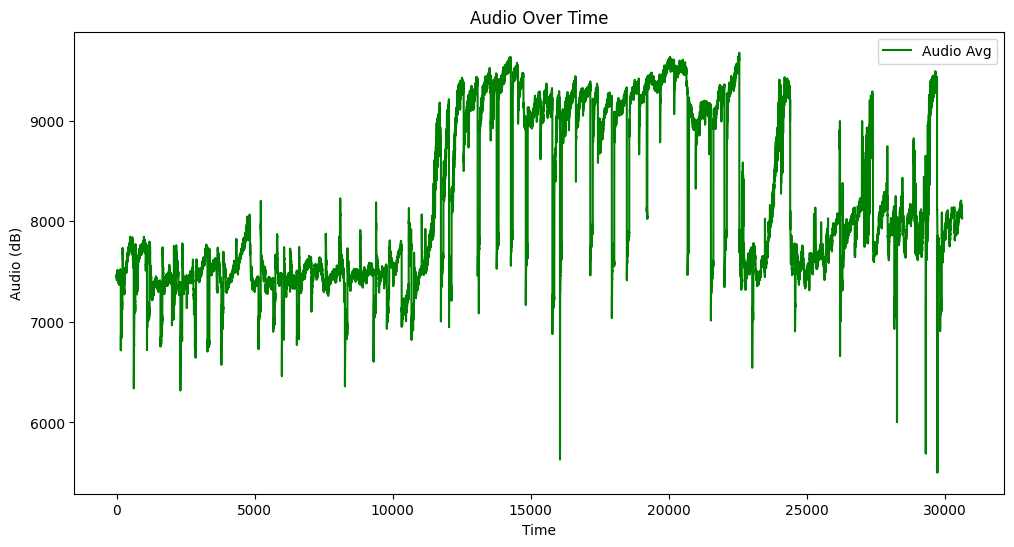

In [63]:
import matplotlib.pyplot as plt

# Toplam ivme ortalamasını görselleştirin
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Total Acceleration Avg ((m/s²)²)'], label='Total Acceleration Avg')
plt.xlabel('Time')
plt.ylabel('Acceleration (m/s²)²')
plt.title('Total Acceleration Over Time')
plt.legend()
plt.show()

# Sıcaklık ortalamasını görselleştirin
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Temperature Avg (°C)'], label='Temperature Avg', color='orange')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.legend()
plt.show()

# Ses ortalamasını görselleştirin
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Audio Avg (dB)'], label='Audio Avg', color='green')
plt.xlabel('Time')
plt.ylabel('Audio (dB)')
plt.title('Audio Over Time')
plt.legend()
plt.show()


## Examining the Distribution of Features
### Let's examine the distribution of each feature by creating histograms and box plots.

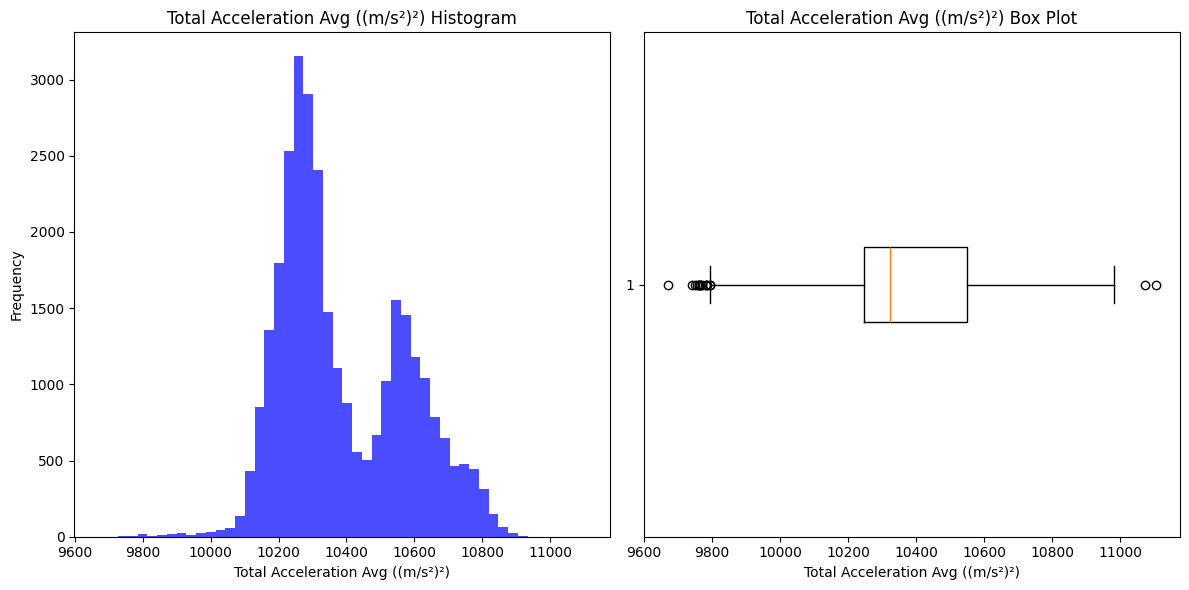

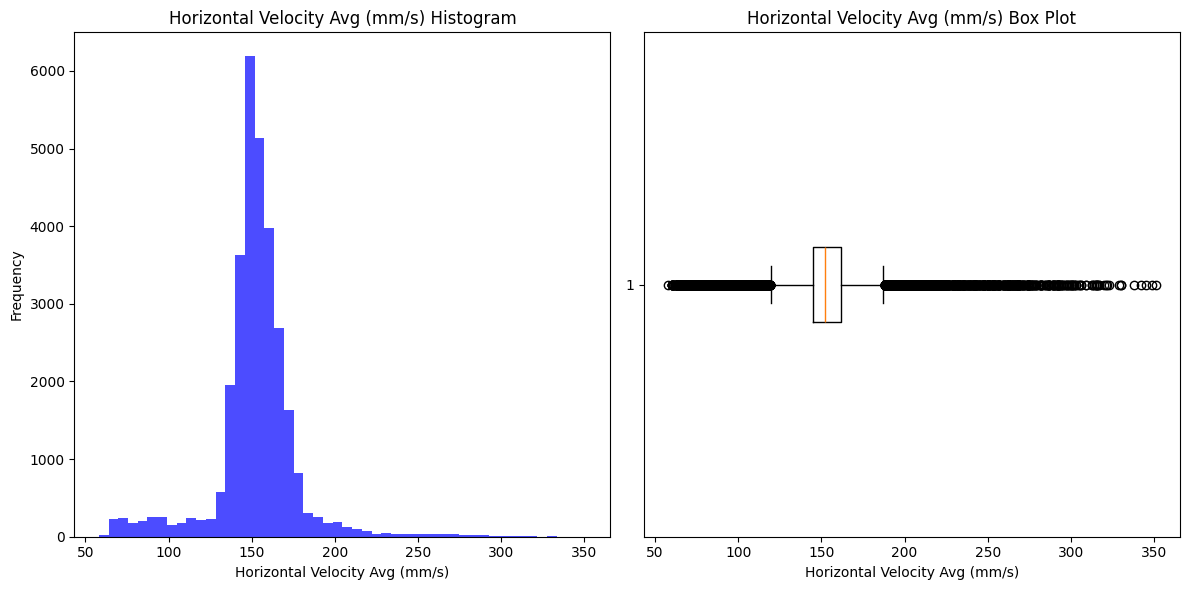

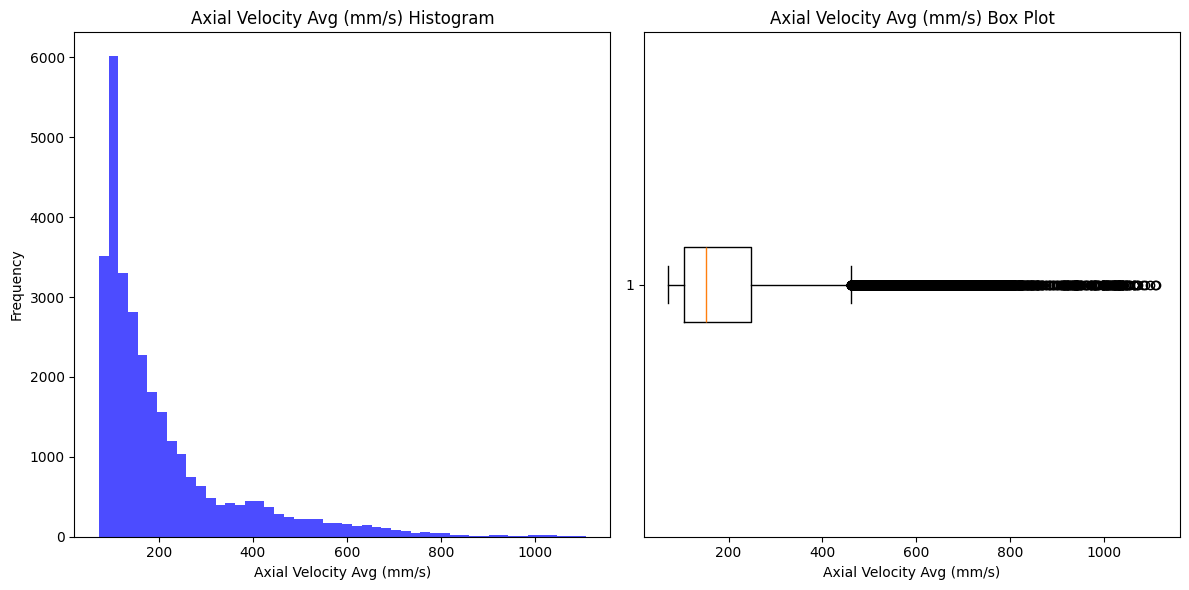

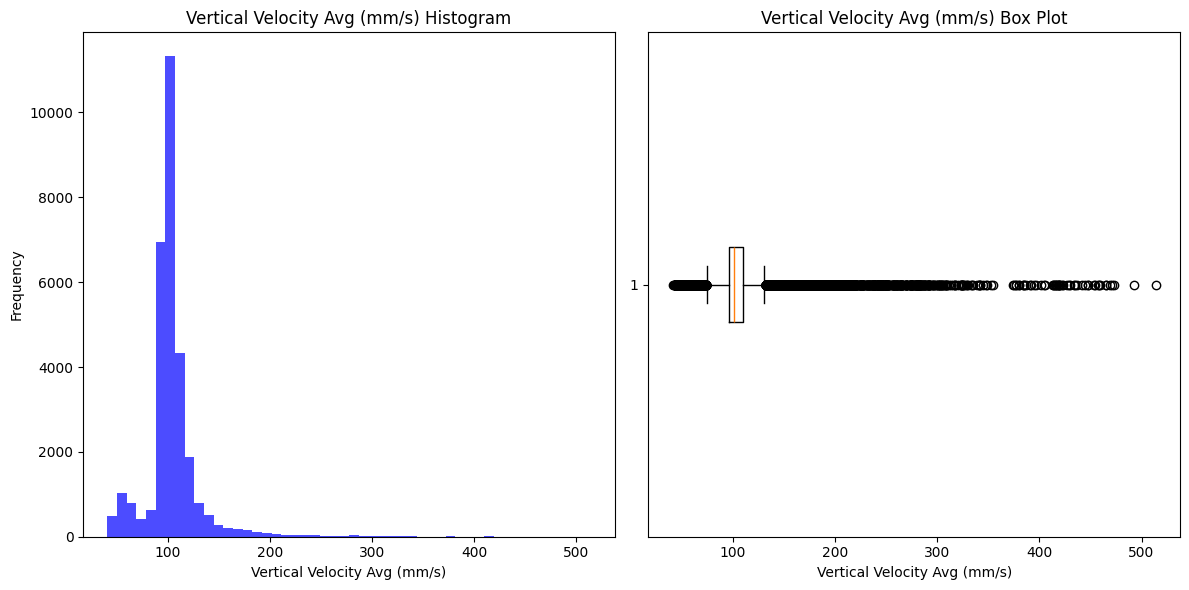

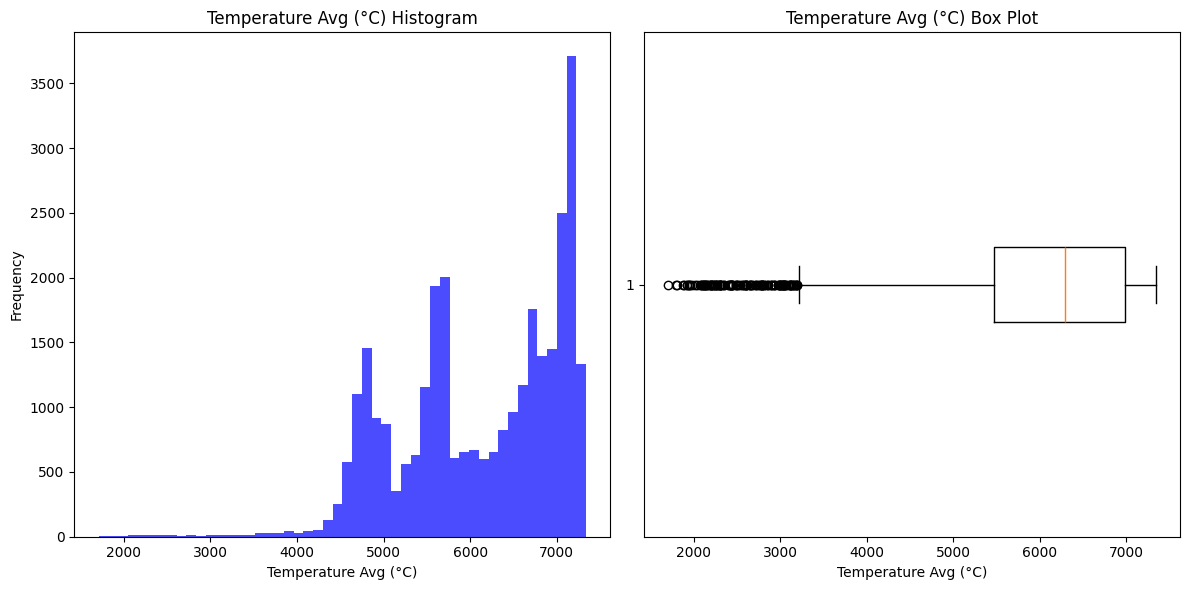

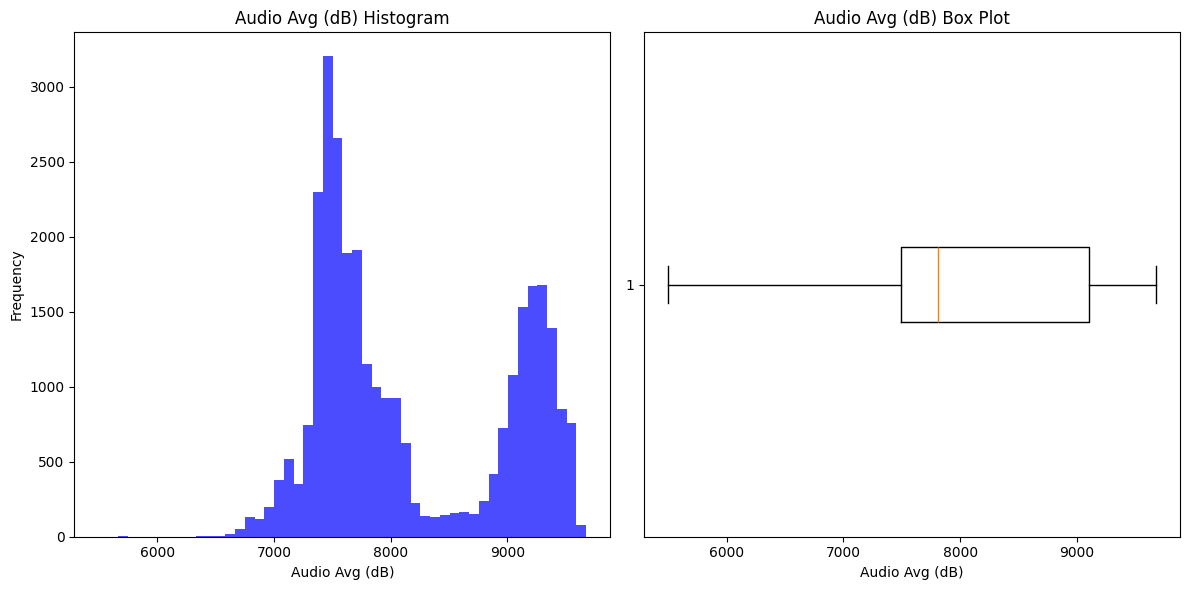

In [62]:
# Histogram ve kutu grafikleri
hist_features = ['Total Acceleration Avg ((m/s²)²)', 'Horizontal Velocity Avg (mm/s)', 'Axial Velocity Avg (mm/s)', 'Vertical Velocity Avg (mm/s)', 'Temperature Avg (°C)', 'Audio Avg (dB)']

for feature in hist_features:
    plt.figure(figsize=(12, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(data[feature], bins=50, color='blue', alpha=0.7)
    plt.title(f'{feature} Histogram')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
    # Kutu grafiği
    plt.subplot(1, 2, 2)
    plt.boxplot(data[feature], vert=False)
    plt.title(f'{feature} Box Plot')
    plt.xlabel(feature)
    
    plt.tight_layout()
    plt.show()


## Examining the Distribution of Target Value
### Let's examine the distribution of target value Arıza(Fault) classes.

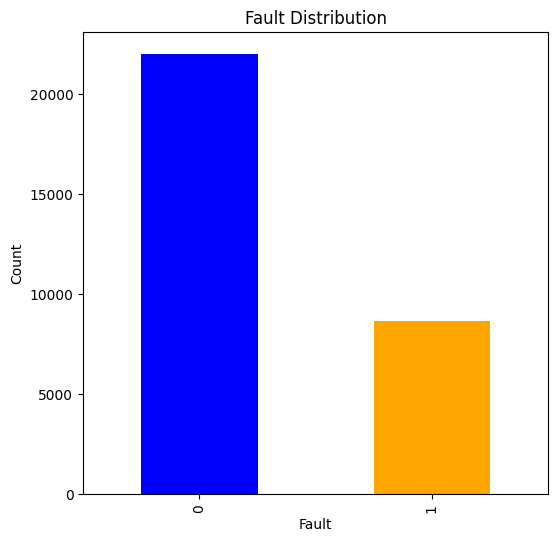

In [53]:
plt.figure(figsize=(6, 6))
target.value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Fault Distribution')
plt.xlabel('Fault')
plt.ylabel('Count')
plt.show()


#### **Looking at the distribution of the Target label we see that the 0(no fault) samples are so much more than the 1(having a fault), to solve this problem we 3 options:**
1. **Collect more real data from sensors for the 1 label:** This is the best option if applicable, but to do that we need the help from the source of the data, so for the moment at the time this option can't be achievable.
2. **Undersampling:** We can remove rows from the 1 samples until they are convenient to each other using Undersampling methods, but this is the worst option possible, because the data already not enough.
3. **We can use Oversampling techniques**: This method can lead to overfitting, especially if synthetic data points are too similar to the existing ones. However, oversampling is generally preferred because it allows the model to learn from all available data, so we will proceed with oversampling.

#### **For time series problems, maintaining the temporal order of data is crucial. Oversampling or undersampling without considering time order can lead to data leakage, where future information is inadvertently used to predict past events.**

**To address this, we should use techniques that respect the temporal structure. Here are some strategies:**

1. **Time-Series Specific Oversampling/Undersampling:**
* **Sliding Window Approach:** Create balanced windows of data, ensuring each window maintains the original time order.
* **Synthetic Minority Over-sampling Technique for Time Series (SMOTE-Tomek):** A variant of SMOTE that considers the time series aspect.
2. **Using Resampling Techniques with Time Series Splitting:**
* **Resampling within time frames:** Apply resampling techniques within specific time frames or windows, rather than across the entire dataset.

### **Implementing a Sliding Window Approach**
We can implement a sliding window approach where we balance the data within each window. Here's how you can do it:

In [64]:
from sklearn.utils import resample

# Combine features and target for convenience
data_combined = pd.concat([features, target], axis=1)

# Oversample the minority class
majority_class = data_combined[data_combined['Arıza'] == 0]
minority_class = data_combined[data_combined['Arıza'] == 1]
minority_class_oversampled = resample(minority_class, 
                                      replace=True, 
                                      n_samples=len(majority_class), 
                                      random_state=42)

# Combine majority class with oversampled minority class
balanced_data_combined = pd.concat([majority_class, minority_class_oversampled])

# Separate features and target again
features= balanced_data_combined.drop(columns=['Arıza'])
target = balanced_data_combined['Arıza']

# Check the new distribution
new_distribution_balanced = target.value_counts()
print(new_distribution_balanced)

# Sliding window approach with balanced data
window_size = 1440  # Number of minutes in a day
windowed_data = []

for start in range(0, len(balanced_data_combined), window_size):
    end = start + window_size
    window = balanced_data_combined[start:end]
    windowed_data.append(window)


Arıza
0    21996
1    21996
Name: count, dtype: int64


### Now lets have a look at our new target distribution

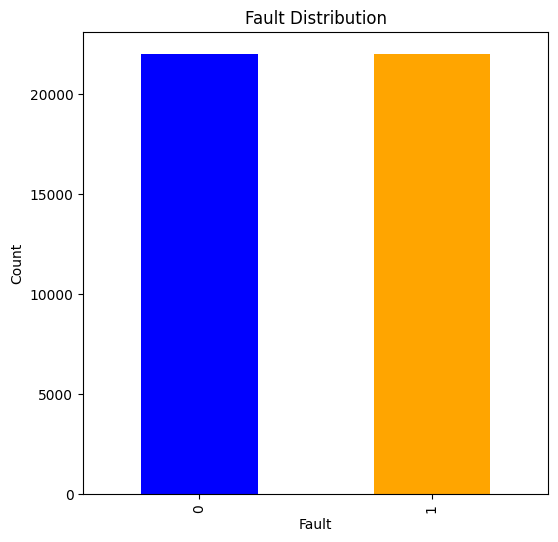

In [65]:
# Hedef değerin dağılımı
plt.figure(figsize=(6, 6))
target.value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Fault Distribution')
plt.xlabel('Fault')
plt.ylabel('Count')
plt.show()


##  Özellikler Arası Korelasyonu İnceleme
### Özellikler arası korelasyonu inceleyerek, hangi özelliklerin birbiriyle ilişkili olduğunu görelim.

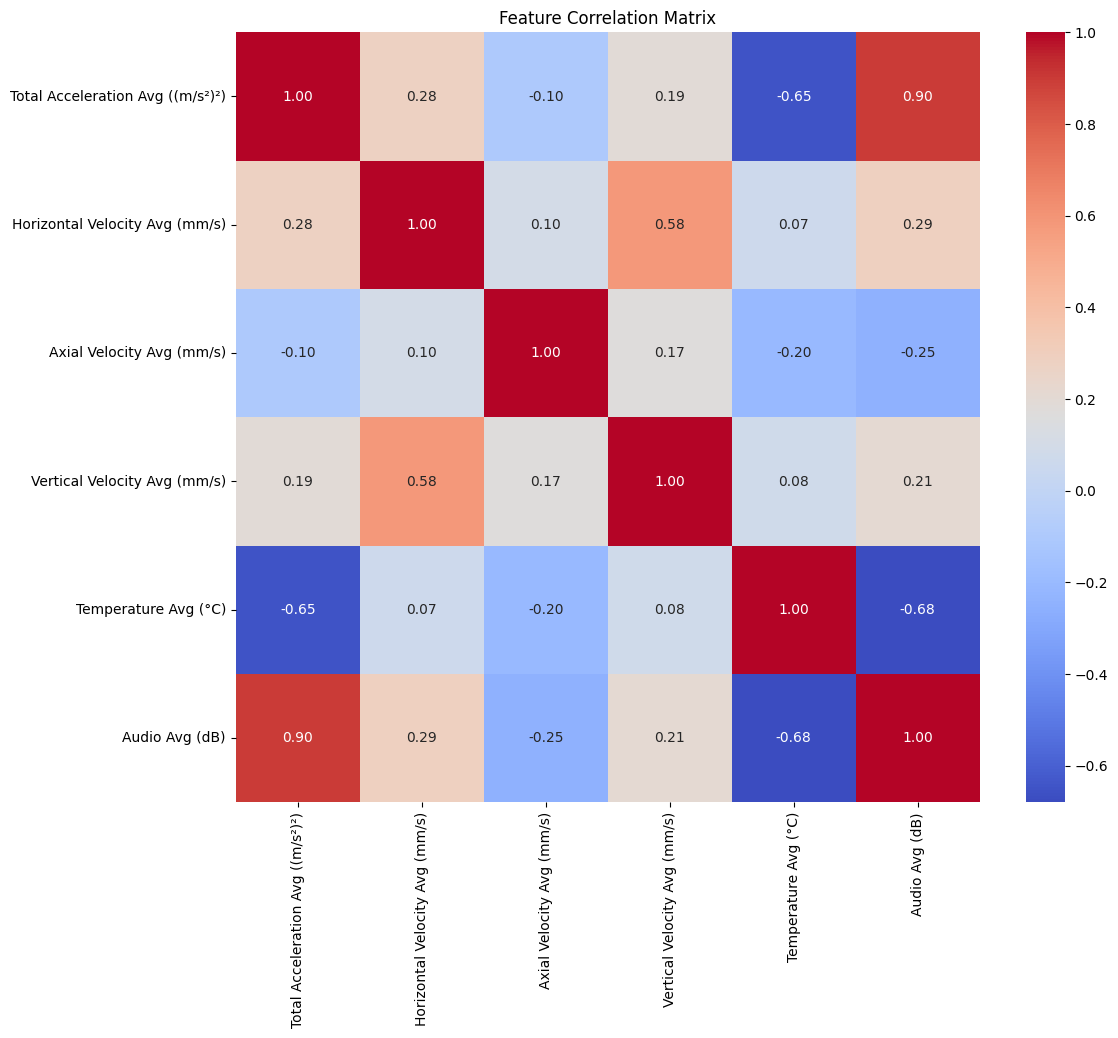

In [67]:
import seaborn as sns

# Korelasyon matrisi
plt.figure(figsize=(12, 10))
correlation_matrix = data[hist_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()


## Scaling the data to prevent Domination between features and doing the train test split

In [68]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Veriyi normalleştirme
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Eğitim ve test setlerine stratified ayırma
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.3, stratify=target, random_state=42)


## Start training with Random forest algorithm by performing hyper-parameter optimization using Grid-search

In [73]:
from sklearn.model_selection import GridSearchCV

# Random Forest modelini oluşturma
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Hiperparametre arama
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# En iyi parametreler ile modeli yeniden eğitme
best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

## Testing the trained model 
### Here is the Accuracy, Precision, Recall ve F1-score


In [70]:
# Modeli değerlendirme
y_pred = best_model.predict(X_test)

# Performans metrikleri
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6599
           1       1.00      1.00      1.00      6599

    accuracy                           1.00     13198
   macro avg       1.00      1.00      1.00     13198
weighted avg       1.00      1.00      1.00     13198

[[6592    7]
 [   1 6598]]


## Confusion Matrix

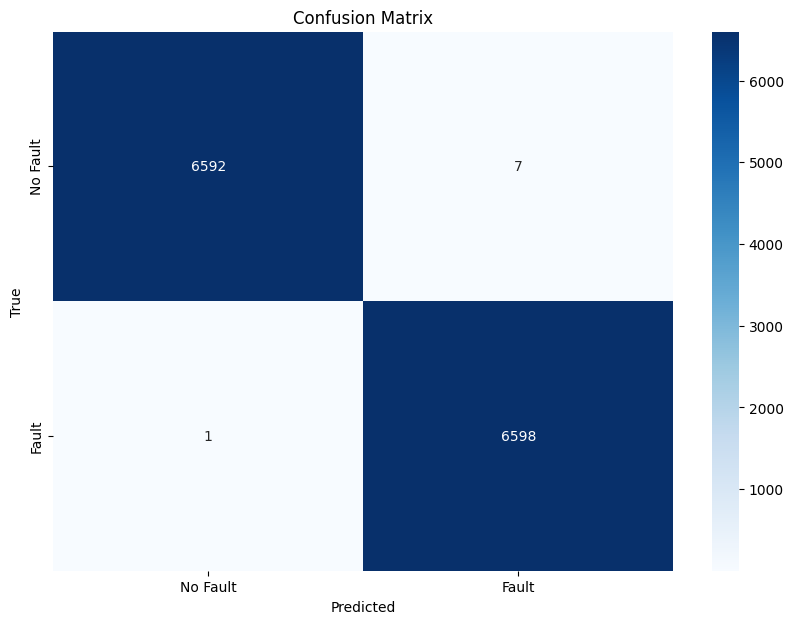

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fault', 'Fault'], yticklabels=['No Fault', 'Fault'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

##  AUC/ROC eğrisi

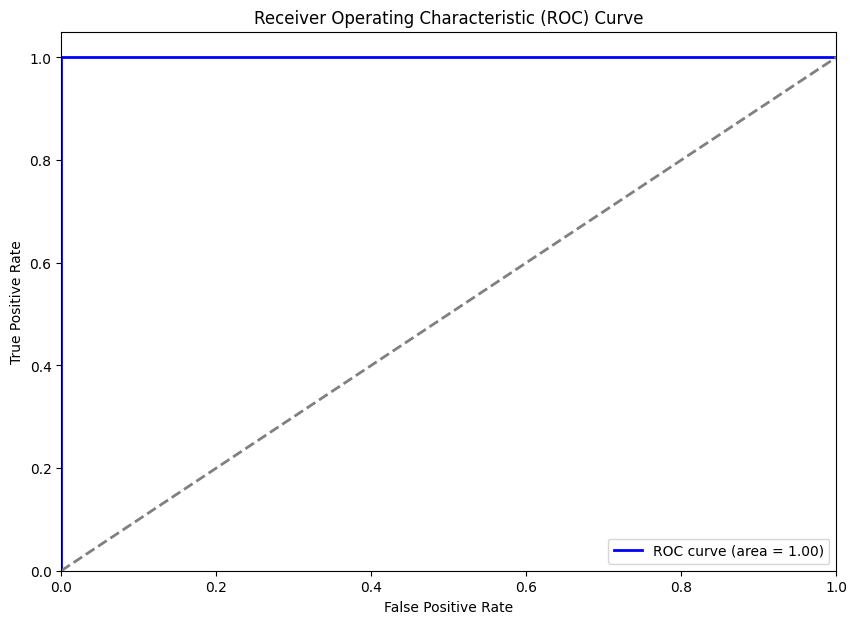

In [72]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# AUC/ROC curve 
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Since a suitable feature engineering for the time series problem was performed, a really high binary classification result was obtained with the Random forest algorithm.
#### Obtained results: 
- Accuracy: 100%  
- Precision: For 0: 100% | For 1: 100%  
- Recall: For 0: 100% | For 1: 100%   
- F1-score: For 0: 100% | For 1: 100%  

This results is kind of scary, and it might show that there is overfitting in here but the thing is that for such a model to work in real life so much more data should be provided, and the test data should be taken from the machine directly to be compared and tested then we can see wether the results is truly true, as for the aproach it is pretty much the right way to choose.  